<h1>ENB28 - Revisiting FFNs with K-fold cross validation</h1>
<h2> neurons per layer on a single layer </h2>

In [1]:
import tensorflow as tf
import keras
from keras import models
from keras import layers

import numpy as np
import os
import csv

import pickle
import time as tm

import matplotlib.pyplot as plt
import pre_process as pp

Using TensorFlow backend.


<h2> Pre-processing</h2>

from here onwards all experiments will run on the same dataset, no more preprocessing will take place just trainging.

In [2]:
data, labels = pp.pre_process()

concatenating files
AReMv1\bending1\dataset1.csv
AReMv1\bending1\dataset2.csv
AReMv1\bending1\dataset3.csv
AReMv1\bending1\dataset4.csv
AReMv1\bending1\dataset5.csv
AReMv1\bending1\dataset6.csv
AReMv1\bending1\dataset7.csv
AReMv1\bending2\dataset1.csv
AReMv1\bending2\dataset2.csv
AReMv1\bending2\dataset3.csv
AReMv1\bending2\dataset5.csv
AReMv1\bending2\dataset6.csv
AReMv1\cycling\dataset1.csv
AReMv1\cycling\dataset10.csv
AReMv1\cycling\dataset11.csv
AReMv1\cycling\dataset12.csv
AReMv1\cycling\dataset13.csv
AReMv1\cycling\dataset14.csv
AReMv1\cycling\dataset15.csv
AReMv1\cycling\dataset2.csv
AReMv1\cycling\dataset3.csv
AReMv1\cycling\dataset4.csv
AReMv1\cycling\dataset5.csv
AReMv1\cycling\dataset6.csv
AReMv1\cycling\dataset7.csv
AReMv1\cycling\dataset8.csv
AReMv1\cycling\dataset9.csv
AReMv1\lying\dataset1.csv
AReMv1\lying\dataset10.csv
AReMv1\lying\dataset11.csv
AReMv1\lying\dataset12.csv
AReMv1\lying\dataset13.csv
AReMv1\lying\dataset14.csv
AReMv1\lying\dataset15.csv
AReMv1\lying\datas

In [3]:
train_data, train_labels, test_data, test_labels = pp.cluster_shuffle_2splits(data, labels)

SHUFFLING ARRAYS
act0 shape:  (7, 480, 6)
act1 shape:  (5, 480, 6)
act2 shape:  (15, 480, 6)
act3 shape:  (15, 480, 6)
act4 shape:  (15, 480, 6)
act5 shape:  (15, 480, 6)
act6 shape:  (15, 480, 6)
SLICING ARRAYS


In [4]:
print(np.shape(train_data))
print(np.shape(train_labels))
print(np.shape(test_data))
print(np.shape(test_labels))

(72, 480, 6)
(72,)
(15, 480, 6)
(15,)


In [5]:
train_data, train_labels = pp.shuffle(train_data, train_labels)

In [8]:
#with open('train_data.txt', 'wb') as fp:
#    pickle.dump(train_data, fp)

#with open('train_labels.txt', 'wb') as fp:
#    pickle.dump(train_labels, fp)
    
#with open('test_data.txt', 'wb') as fp:
#    pickle.dump(test_data, fp)
    
#with open('test_labels.txt', 'wb') as fp:
#    pickle.dump(test_labels, fp)

In [9]:
with open('train_data.txt', 'rb') as fp:
    train_data = pickle.load(fp)
    
with open('train_labels.txt', 'rb') as fp:
    train_labels = pickle.load(fp)
    
with open('test_data.txt', 'rb') as fp:
    test_data = pickle.load(fp)
    
with open('test_labels.txt', 'rb') as fp:
    test_labels = pickle.load(fp)

<h2>k-fold params</h2>

In [10]:
k = 4
num_val_samples = len(train_data)
print(num_val_samples)
val_split_size = num_val_samples/k
val_split_size = int(val_split_size)
print(val_split_size)
type(val_split_size)

72
18


int

<h2>Experiment1: a single layer</h2>

In [11]:
net1 = models.Sequential()
net1.add(layers.Dense((480), input_shape = (480,6)))
net1.add(layers.Flatten())
net1.add(layers.Dense(480,activation='relu'))
net1.add(layers.Dense(7, activation = 'softmax'))
net1.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 480, 480)          3360      
_________________________________________________________________
flatten_1 (Flatten)          (None, 230400)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 480)               110592480 
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 3367      
Total params: 110,599,207
Trainable params: 110,599,207
Non-trainable params: 0
_________________________________________________________________


In [12]:
net1.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
net1.save_weights('net1.h5')  # each split will start with same weights so can directly compare results

In [13]:

histories1 = []
results_list1 = []
index = 0
fold = val_split_size



start = tm.time()

for i in range (k):
    print(i)
    val_fold = train_data[index:fold]
    train_fold = np.delete(train_data, np.s_[index:fold],0)

    val_tgt = train_labels[index:fold]
    train_tgt = np.delete(train_labels, np.s_[index:fold])
    
    
    net1.load_weights('net1.h5')
    history = net1.fit(train_fold, train_tgt, epochs = 25, validation_data = (val_fold, val_tgt))

    histories1.append(history)
    
    
    results = net1.evaluate(test_data, test_labels)
    results_list1.append(results)
    print(results)
    
    index = index + val_split_size
    fold = fold + val_split_size
    
finish = tm.time()
duration1 = finish - start

0

Train on 54 samples, validate on 18 samples
Epoch 1/25
54/54 [==============================] - 3s 48ms/step - loss: 16.9109 - accuracy: 0.2037 - val_loss: 18.8709 - val_accuracy: 0.3333
Epoch 2/25
54/54 [==============================] - 3s 48ms/step - loss: 15.6150 - accuracy: 0.3704 - val_loss: 9.6033 - val_accuracy: 0.2778
Epoch 3/25
54/54 [==============================] - 3s 49ms/step - loss: 12.0695 - accuracy: 0.2963 - val_loss: 7.0561 - val_accuracy: 0.5000
Epoch 4/25
54/54 [==============================] - 3s 49ms/step - loss: 8.0890 - accuracy: 0.4444 - val_loss: 5.2080 - val_accuracy: 0.2222
Epoch 5/25
54/54 [==============================] - 3s 50ms/step - loss: 4.4448 - accuracy: 0.4074 - val_loss: 2.3458 - val_accuracy: 0.6111
Epoch 6/25
54/54 [==============================] - 3s 49ms/step - loss: 2.3316 - accuracy: 0.5185 - val_loss: 3.6181 - val_accuracy: 0.2778
Epoch 7/25
54/54 [==============================] - 3s 50ms/step - loss: 2.7855 - accuracy: 0.5185 - va

Epoch 5/25
54/54 [==============================] - 3s 50ms/step - loss: 3.8948 - accuracy: 0.3519 - val_loss: 3.4104 - val_accuracy: 0.5556
Epoch 6/25
54/54 [==============================] - 3s 50ms/step - loss: 2.6974 - accuracy: 0.4259 - val_loss: 3.7384 - val_accuracy: 0.2222
Epoch 7/25
54/54 [==============================] - 3s 51ms/step - loss: 2.5900 - accuracy: 0.4074 - val_loss: 2.2482 - val_accuracy: 0.3889
Epoch 8/25
54/54 [==============================] - 3s 49ms/step - loss: 1.4516 - accuracy: 0.4815 - val_loss: 1.2906 - val_accuracy: 0.4444
Epoch 9/25
54/54 [==============================] - 3s 50ms/step - loss: 1.2285 - accuracy: 0.4444 - val_loss: 1.1003 - val_accuracy: 0.7222
Epoch 10/25
54/54 [==============================] - 3s 50ms/step - loss: 0.8242 - accuracy: 0.6852 - val_loss: 1.2758 - val_accuracy: 0.3889
Epoch 11/25
54/54 [==============================] - 3s 50ms/step - loss: 0.8428 - accuracy: 0.6111 - val_loss: 1.2310 - val_accuracy: 0.5000
Epoch 12/25

In [14]:
avg = np.mean(results_list1, axis=0)
std_dev = np.std(results_list1, axis=0)
print('Average loss and accuracy scores were: ', avg)
print('Standard deviation for loss & accuracy: ', std_dev)
print('Duration in seconds: ', int(duration1))

Average loss and accuracy scores were:  [0.6456759  0.75000001]
Standard deviation for loss & accuracy:  [0.12184675 0.08660254]
Duration in seconds:  270


In [15]:
print(results_list1)

[[0.5604438185691833, 0.800000011920929], [0.8353902697563171, 0.6000000238418579], [0.5203861594200134, 0.800000011920929], [0.6664833426475525, 0.800000011920929]]


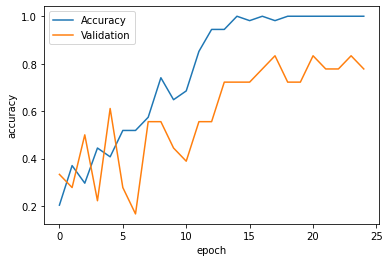

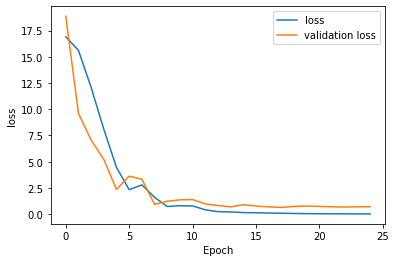

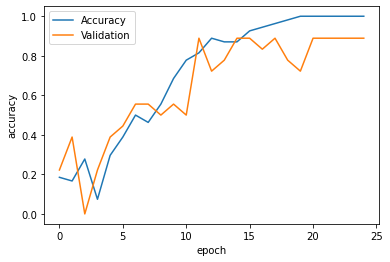

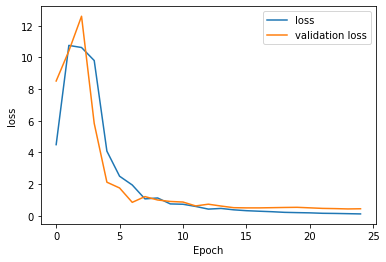

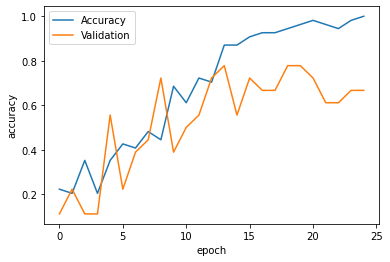

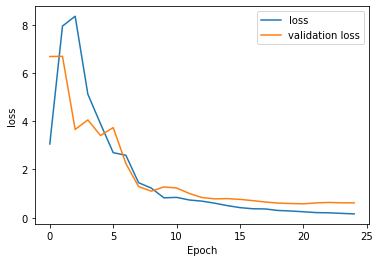

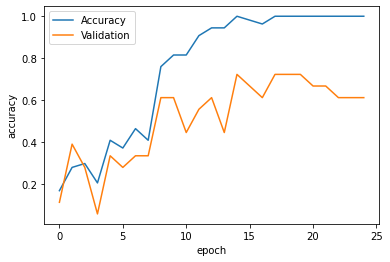

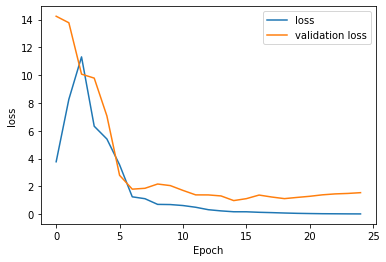

In [16]:
for history in histories1:
    pp.plot_accuracy(history)
    pp.plot_loss(history)

In [12]:
print(results_list1)

[[0.5239748358726501, 0.8666666746139526], [0.8505274653434753, 0.6666666865348816], [1.0043165683746338, 0.6000000238418579], [0.9364311695098877, 0.6666666865348816]]


<h2> Expriment2:</h2>

In [17]:
net2 = models.Sequential()
net2.add(layers.Dense((480), input_shape = (480,6)))
net2.add(layers.Flatten())
net2.add(layers.Dense(64,activation='relu'))
net2.add(layers.Dense(7, activation = 'softmax'))
net2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 480, 480)          3360      
_________________________________________________________________
flatten_2 (Flatten)          (None, 230400)            0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                14745664  
_________________________________________________________________
dense_6 (Dense)              (None, 7)                 455       
Total params: 14,749,479
Trainable params: 14,749,479
Non-trainable params: 0
_________________________________________________________________


In [18]:
net2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
net2.save_weights('net2.h5')  # each split will start with same weights so can directly compare results

histories2 = []
results_list2 = []
index = 0
fold = val_split_size



start = tm.time()

for i in range (k):
    print(i)
    val_fold = train_data[index:fold]
    train_fold = np.delete(train_data, np.s_[index:fold],0)

    val_tgt = train_labels[index:fold]
    train_tgt = np.delete(train_labels, np.s_[index:fold])
    
    
    net2.load_weights('net2.h5')
    history = net2.fit(train_fold, train_tgt, epochs = 25, validation_data = (val_fold, val_tgt))

    histories2.append(history)
    
    
    results = net2.evaluate(test_data, test_labels)
    results_list2.append(results)
    print(results)
    
    index = index + val_split_size
    fold = fold + val_split_size

finish = tm.time()
duration2 = finish - start

0
Train on 54 samples, validate on 18 samples
Epoch 1/25
54/54 [==============================] - 0s 8ms/step - loss: 5.4484 - accuracy: 0.1111 - val_loss: 10.4207 - val_accuracy: 0.2222
Epoch 2/25
54/54 [==============================] - 0s 7ms/step - loss: 8.9561 - accuracy: 0.2037 - val_loss: 5.1516 - val_accuracy: 0.1667
Epoch 3/25
54/54 [==============================] - 0s 7ms/step - loss: 4.2724 - accuracy: 0.2963 - val_loss: 3.5231 - val_accuracy: 0.2778
Epoch 4/25
54/54 [==============================] - 0s 7ms/step - loss: 4.4268 - accuracy: 0.1852 - val_loss: 5.1430 - val_accuracy: 0.1667
Epoch 5/25
54/54 [==============================] - 0s 7ms/step - loss: 4.0993 - accuracy: 0.2407 - val_loss: 2.5889 - val_accuracy: 0.1667
Epoch 6/25
54/54 [==============================] - 0s 7ms/step - loss: 2.2287 - accuracy: 0.3889 - val_loss: 1.9295 - val_accuracy: 0.5000
Epoch 7/25
54/54 [==============================] - 0s 7ms/step - loss: 1.7815 - accuracy: 0.3889 - val_loss: 1.5

Epoch 7/25
54/54 [==============================] - 0s 7ms/step - loss: 1.5495 - accuracy: 0.3889 - val_loss: 1.7545 - val_accuracy: 0.1667
Epoch 8/25
54/54 [==============================] - ETA: 0s - loss: 1.4236 - accuracy: 0.25 - 0s 7ms/step - loss: 1.5410 - accuracy: 0.2963 - val_loss: 1.8488 - val_accuracy: 0.1111
Epoch 9/25
54/54 [==============================] - 0s 7ms/step - loss: 1.5740 - accuracy: 0.1852 - val_loss: 1.9276 - val_accuracy: 0.1111
Epoch 10/25
54/54 [==============================] - 0s 7ms/step - loss: 1.3521 - accuracy: 0.2407 - val_loss: 1.8636 - val_accuracy: 0.4444
Epoch 11/25
54/54 [==============================] - 0s 7ms/step - loss: 1.4386 - accuracy: 0.4815 - val_loss: 1.8353 - val_accuracy: 0.3333
Epoch 12/25
54/54 [==============================] - 0s 7ms/step - loss: 1.3515 - accuracy: 0.4630 - val_loss: 2.0027 - val_accuracy: 0.2222
Epoch 13/25
54/54 [==============================] - 0s 7ms/step - loss: 1.3507 - accuracy: 0.3889 - val_loss: 1.67

In [19]:
avg = np.mean(results_list2, axis=0)
std_dev = np.std(results_list2, axis=0)
print('Average loss and accuracy scores were: ', avg)
print('Standard deviation for loss & accuracy: ', std_dev)
print('Duration in seconds: ', int(duration2))

Average loss and accuracy scores were:  [1.04658714 0.63333335]
Standard deviation for loss & accuracy:  [0.34999618 0.15275253]
Duration in seconds:  38


<h2> Expriment3:</h2>

In [20]:
net3 = models.Sequential()
net3.add(layers.Dense((480), input_shape = (480,6)))
net3.add(layers.Flatten())
net3.add(layers.Dense(120,activation='relu'))
net3.add(layers.Dense(7, activation = 'softmax'))
net3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 480, 480)          3360      
_________________________________________________________________
flatten_3 (Flatten)          (None, 230400)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 120)               27648120  
_________________________________________________________________
dense_9 (Dense)              (None, 7)                 847       
Total params: 27,652,327
Trainable params: 27,652,327
Non-trainable params: 0
_________________________________________________________________


In [21]:
net3.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
net3.save_weights('net3.h5')  # each split will start with same weights so can directly compare results

histories3 = []
results_list3 = []
index = 0
fold = val_split_size



start = tm.time()

for i in range (k):
    print(i)
    val_fold = train_data[index:fold]
    train_fold = np.delete(train_data, np.s_[index:fold],0)

    val_tgt = train_labels[index:fold]
    train_tgt = np.delete(train_labels, np.s_[index:fold])
    
    
    net3.load_weights('net3.h5')
    history = net3.fit(train_fold, train_tgt, epochs = 25, validation_data = (val_fold, val_tgt))

    histories3.append(history)
    
    
    results = net3.evaluate(test_data, test_labels)
    results_list3.append(results)
    print(results)
    
    index = index + val_split_size
    fold = fold + val_split_size

finish = tm.time()
duration3 = finish - start

0
Train on 54 samples, validate on 18 samples
Epoch 1/25
54/54 [==============================] - 1s 14ms/step - loss: 7.4113 - accuracy: 0.0556 - val_loss: 13.1121 - val_accuracy: 0.2222
Epoch 2/25
54/54 [==============================] - 1s 12ms/step - loss: 12.6914 - accuracy: 0.1852 - val_loss: 9.5279 - val_accuracy: 0.2778
Epoch 3/25
54/54 [==============================] - 1s 12ms/step - loss: 10.3257 - accuracy: 0.3333 - val_loss: 13.5985 - val_accuracy: 0.2222
Epoch 4/25
54/54 [==============================] - 1s 12ms/step - loss: 10.8158 - accuracy: 0.2593 - val_loss: 9.9509 - val_accuracy: 0.1111
Epoch 5/25
54/54 [==============================] - 1s 13ms/step - loss: 7.2181 - accuracy: 0.2778 - val_loss: 5.2757 - val_accuracy: 0.0556
Epoch 6/25
54/54 [==============================] - 1s 13ms/step - loss: 5.0361 - accuracy: 0.2778 - val_loss: 4.1968 - val_accuracy: 0.5000
Epoch 7/25
54/54 [==============================] - 1s 12ms/step - loss: 3.8627 - accuracy: 0.3519 - va

54/54 [==============================] - 1s 12ms/step - loss: 2.7075 - accuracy: 0.3889 - val_loss: 2.0854 - val_accuracy: 0.2222
Epoch 7/25
54/54 [==============================] - 1s 12ms/step - loss: 1.7351 - accuracy: 0.3333 - val_loss: 1.7915 - val_accuracy: 0.2222
Epoch 8/25
54/54 [==============================] - 1s 12ms/step - loss: 1.7171 - accuracy: 0.2222 - val_loss: 1.6807 - val_accuracy: 0.2222
Epoch 9/25
54/54 [==============================] - 1s 13ms/step - loss: 1.5209 - accuracy: 0.4815 - val_loss: 1.7140 - val_accuracy: 0.4444
Epoch 10/25
54/54 [==============================] - 1s 13ms/step - loss: 1.4002 - accuracy: 0.5370 - val_loss: 1.5815 - val_accuracy: 0.3889
Epoch 11/25
54/54 [==============================] - 1s 12ms/step - loss: 1.2634 - accuracy: 0.4815 - val_loss: 1.3939 - val_accuracy: 0.5000
Epoch 12/25
54/54 [==============================] - 1s 12ms/step - loss: 1.1633 - accuracy: 0.4815 - val_loss: 1.3033 - val_accuracy: 0.5000
Epoch 13/25
54/54 [==

In [22]:
avg = np.mean(results_list3, axis=0)
std_dev = np.std(results_list3, axis=0)
print('Average loss and accuracy scores were: ', avg)
print('Standard deviation for loss & accuracy: ', std_dev)
print('Duration in seconds: ', int(duration3))

Average loss and accuracy scores were:  [0.78539442 0.76666668]
Standard deviation for loss & accuracy:  [0.26322416 0.13743685]
Duration in seconds:  68


<h2> Expriment4:</h2>

In [23]:
net4 = models.Sequential()
net4.add(layers.Dense((480), input_shape = (480,6)))
net4.add(layers.Flatten())
net4.add(layers.Dense(240,activation='relu'))
net4.add(layers.Dense(7, activation = 'softmax'))
net4.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 480, 480)          3360      
_________________________________________________________________
flatten_4 (Flatten)          (None, 230400)            0         
_________________________________________________________________
dense_11 (Dense)             (None, 240)               55296240  
_________________________________________________________________
dense_12 (Dense)             (None, 7)                 1687      
Total params: 55,301,287
Trainable params: 55,301,287
Non-trainable params: 0
_________________________________________________________________


In [24]:
net4.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
net4.save_weights('net4.h5')  # each split will start with same weights so can directly compare results

histories4 = []
results_list4 = []
index = 0
fold = val_split_size



start = tm.time()

for i in range (k):
    print(i)
    val_fold = train_data[index:fold]
    train_fold = np.delete(train_data, np.s_[index:fold],0)

    val_tgt = train_labels[index:fold]
    train_tgt = np.delete(train_labels, np.s_[index:fold])
    
    
    net4.load_weights('net4.h5')
    history = net4.fit(train_fold, train_tgt, epochs = 25, validation_data = (val_fold, val_tgt))

    histories4.append(history)
    
    
    results = net4.evaluate(test_data, test_labels)
    results_list4.append(results)
    print(results)
    
    index = index + val_split_size
    fold = fold + val_split_size

finish = tm.time()
duration4 = finish - start

0
Train on 54 samples, validate on 18 samples
Epoch 1/25
54/54 [==============================] - 1s 26ms/step - loss: 9.0731 - accuracy: 0.1667 - val_loss: 12.2364 - val_accuracy: 0.2778
Epoch 2/25
54/54 [==============================] - 1s 25ms/step - loss: 17.0479 - accuracy: 0.1667 - val_loss: 14.7135 - val_accuracy: 0.2222
Epoch 3/25
54/54 [==============================] - 1s 25ms/step - loss: 14.4479 - accuracy: 0.3148 - val_loss: 12.0932 - val_accuracy: 0.2222
Epoch 4/25
54/54 [==============================] - 1s 26ms/step - loss: 11.8749 - accuracy: 0.2593 - val_loss: 9.8997 - val_accuracy: 0.1667
Epoch 5/25
54/54 [==============================] - 1s 26ms/step - loss: 8.3791 - accuracy: 0.2407 - val_loss: 3.8385 - val_accuracy: 0.4444
Epoch 6/25
54/54 [==============================] - 1s 25ms/step - loss: 3.3319 - accuracy: 0.5000 - val_loss: 1.5737 - val_accuracy: 0.5000
Epoch 7/25
54/54 [==============================] - 1s 26ms/step - loss: 1.3290 - accuracy: 0.6667 - v

54/54 [==============================] - 1s 26ms/step - loss: 1.3899 - accuracy: 0.3889 - val_loss: 1.8173 - val_accuracy: 0.2222
Epoch 7/25
54/54 [==============================] - 1s 26ms/step - loss: 1.3309 - accuracy: 0.4630 - val_loss: 1.6805 - val_accuracy: 0.3889
Epoch 8/25
54/54 [==============================] - 1s 26ms/step - loss: 1.1560 - accuracy: 0.5741 - val_loss: 1.5297 - val_accuracy: 0.4444
Epoch 9/25
54/54 [==============================] - 1s 26ms/step - loss: 1.0875 - accuracy: 0.5926 - val_loss: 1.4190 - val_accuracy: 0.5000
Epoch 10/25
54/54 [==============================] - 1s 26ms/step - loss: 1.0306 - accuracy: 0.6667 - val_loss: 1.3182 - val_accuracy: 0.4444
Epoch 11/25
54/54 [==============================] - 1s 26ms/step - loss: 0.8472 - accuracy: 0.6852 - val_loss: 1.2035 - val_accuracy: 0.5556
Epoch 12/25
54/54 [==============================] - 1s 26ms/step - loss: 0.7955 - accuracy: 0.7593 - val_loss: 1.2575 - val_accuracy: 0.4444
Epoch 13/25
54/54 [==

In [25]:
avg = np.mean(results_list4, axis=0)
std_dev = np.std(results_list4, axis=0)
print('Average loss and accuracy scores were: ', avg)
print('Standard deviation for loss & accuracy: ', std_dev)
print('Duration in seconds: ', int(duration4))

Average loss and accuracy scores were:  [0.60561329 0.75000001]
Standard deviation for loss & accuracy:  [0.08116928 0.05527708]
Duration in seconds:  142


<h2> Expriment5:</h2>

In [26]:
net5 = models.Sequential()
net5.add(layers.Dense((480), input_shape = (480,6)))
net5.add(layers.Flatten())
net5.add(layers.Dense(360,activation='relu'))
net5.add(layers.Dense(7, activation = 'softmax'))
net5.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 480, 480)          3360      
_________________________________________________________________
flatten_5 (Flatten)          (None, 230400)            0         
_________________________________________________________________
dense_14 (Dense)             (None, 360)               82944360  
_________________________________________________________________
dense_15 (Dense)             (None, 7)                 2527      
Total params: 82,950,247
Trainable params: 82,950,247
Non-trainable params: 0
_________________________________________________________________


In [27]:
net5.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
net5.save_weights('net5.h5')  # each split will start with same weights so can directly compare results

histories5 = []
results_list5 = []
index = 0
fold = val_split_size



start = tm.time()

for i in range (k):
    print(i)
    val_fold = train_data[index:fold]
    train_fold = np.delete(train_data, np.s_[index:fold],0)

    val_tgt = train_labels[index:fold]
    train_tgt = np.delete(train_labels, np.s_[index:fold])
    
    
    net5.load_weights('net5.h5')
    history = net5.fit(train_fold, train_tgt, epochs = 25, validation_data = (val_fold, val_tgt))

    histories5.append(history)
    
    
    results = net5.evaluate(test_data, test_labels)
    results_list5.append(results)
    print(results)
    
    index = index + val_split_size
    fold = fold + val_split_size

finish = tm.time()
duration5 = finish - start

0
Train on 54 samples, validate on 18 samples
Epoch 1/25
54/54 [==============================] - 2s 41ms/step - loss: 9.0384 - accuracy: 0.0926 - val_loss: 11.6580 - val_accuracy: 0.2778
Epoch 2/25
54/54 [==============================] - 2s 40ms/step - loss: 16.9004 - accuracy: 0.1667 - val_loss: 17.9464 - val_accuracy: 0.3333
Epoch 3/25
54/54 [==============================] - 2s 39ms/step - loss: 18.4408 - accuracy: 0.2407 - val_loss: 16.2424 - val_accuracy: 0.2778
Epoch 4/25
54/54 [==============================] - 2s 39ms/step - loss: 15.2771 - accuracy: 0.2407 - val_loss: 9.7017 - val_accuracy: 0.2778
Epoch 5/25
54/54 [==============================] - 2s 40ms/step - loss: 8.2217 - accuracy: 0.2593 - val_loss: 7.1539 - val_accuracy: 0.3333
Epoch 6/25
54/54 [==============================] - 2s 40ms/step - loss: 4.8262 - accuracy: 0.3889 - val_loss: 6.4013 - val_accuracy: 0.0556
Epoch 7/25
54/54 [==============================] - 2s 40ms/step - loss: 4.0235 - accuracy: 0.1296 - v

54/54 [==============================] - 2s 40ms/step - loss: 2.0667 - accuracy: 0.4444 - val_loss: 2.9684 - val_accuracy: 0.3889
Epoch 7/25
54/54 [==============================] - 2s 41ms/step - loss: 2.1465 - accuracy: 0.3333 - val_loss: 2.4647 - val_accuracy: 0.4444
Epoch 8/25
54/54 [==============================] - 2s 40ms/step - loss: 1.2090 - accuracy: 0.5556 - val_loss: 1.9323 - val_accuracy: 0.4444
Epoch 9/25
54/54 [==============================] - 2s 40ms/step - loss: 0.9586 - accuracy: 0.6852 - val_loss: 2.2843 - val_accuracy: 0.4444
Epoch 10/25
54/54 [==============================] - 2s 41ms/step - loss: 1.0404 - accuracy: 0.6667 - val_loss: 1.8338 - val_accuracy: 0.3889
Epoch 11/25
54/54 [==============================] - 2s 40ms/step - loss: 0.8883 - accuracy: 0.6667 - val_loss: 1.3611 - val_accuracy: 0.5000
Epoch 12/25
54/54 [==============================] - 2s 40ms/step - loss: 0.5896 - accuracy: 0.7778 - val_loss: 1.1120 - val_accuracy: 0.5000
Epoch 13/25
54/54 [==

In [28]:
avg = np.mean(results_list5, axis=0)
std_dev = np.std(results_list5, axis=0)
print('Average loss and accuracy scores were: ', avg)
print('Standard deviation for loss & accuracy: ', std_dev)
print('Duration in seconds: ', int(duration5))

Average loss and accuracy scores were:  [0.66281129 0.73333335]
Standard deviation for loss & accuracy:  [0.0821922  0.08164965]
Duration in seconds:  219
